# Part 1 - Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [3]:
# Downloading the train set
yf.pdr_override()

dataset_train = pdr.get_data_yahoo("PETR4.SA", start="2015-01-01", end="2020-08-01")
training_set = dataset_train.iloc[:,3:4].values

# Parameters
days_ahead =  5
timesteps =  60

# Feature Scalling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
#testing_set_scaled = sc.fit_transform(testing_set)


#creating a train data structure with defined timesteps and 1 output 
x_train = []
y_train = []
for i in range(timesteps, len(dataset_train)):
    x_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping to Keras
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


# Part 2 - Building the RNN

In [4]:
# Importing the libraries
import tensorflow as tf
import keras as kr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [5]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding  the output layer
regressor.add(Dense(units = 1))


# Compilling the RNN to the Training set
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
42/42 [==============================] - 3s 63ms/step - loss: 0.0455
Epoch 2/30
42/42 [==============================] - 2s 52ms/step - loss: 0.0104
Epoch 3/30
42/42 [==============================] - 3s 63ms/step - loss: 0.0089
Epoch 4/30
42/42 [==============================] - 2s 52ms/step - loss: 0.0086
Epoch 5/30
42/42 [==============================] - 2s 53ms/step - loss: 0.0078
Epoch 6/30
42/42 [==============================] - 2s 56ms/step - loss: 0.0070
Epoch 7/30
42/42 [==============================] - 2s 53ms/step - loss: 0.0071
Epoch 8/30
42/42 [==============================] - 2s 58ms/step - loss: 0.0070
Epoch 9/30
42/42 [==============================] - 3s 61ms/step - loss: 0.0059
Epoch 10/30
42/42 [==============================] - 2s 57ms/step - loss: 0.0058
Epoch 11/30
42/42 [==============================] - 3s 66ms/step - loss: 0.0055
Epoch 12/30
42/42 [==============================] - 3s 64ms/step - loss: 0.0048
Epoch 13/30
42/42 [==================

# Part 3 - Making the prediction and visualising the results

[*********************100%***********************]  1 of 1 completed
60
[[0.88242555]]
61
[[0.87084544]]
62
[[0.85875547]]
63
[[0.84861624]]
64
[[0.84112084]]
65
[[0.81217086]]
66
[[0.83573484]]
67
[[0.8543515]]
68
[[0.86522114]]
69
[[0.86992013]]
70
[[0.9684756]]
71
[[0.96278]]
72
[[0.9530231]]
73
[[0.94358134]]
74
[[0.93565655]]
75
[[0.87019324]]
76
[[0.8560802]]
77
[[0.845845]]
78
[[0.83872116]]
79
[[0.8337954]]
80
[[0.8353137]]
81
[[0.8258585]]
82
[[0.8195995]]
83
[[0.8165029]]
84
[[0.8157817]]
85
[[0.85567033]]
86
[[0.8787416]]
87
[[0.8948437]]
88
[[0.90372276]]
89
[[0.9074162]]
90
[[0.8345164]]
91
[[0.8019662]]
92
[[0.77809966]]
93
[[0.76470757]]
94
[[0.7596108]]
95
[[0.694669]]
96
[[0.684031]]
97
[[0.67756844]]
98
[[0.6756934]]
99
[[0.6778333]]
100
[[0.526089]]
101
[[0.48982173]]
102
[[0.4668032]]
103
[[0.45762184]]
104
[[0.45940638]]
105
[[0.3728376]]
106
[[0.37417063]]
107
[[0.38350028]]
108
[[0.39709413]]
109
[[0.41222438]]
110
[[0.47994128]]
111
[[0.5050696]]
112
[[0.5252154

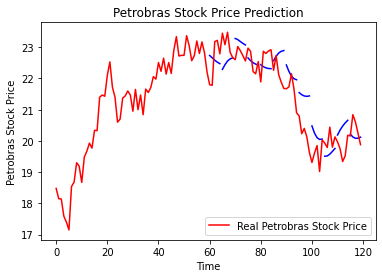

In [9]:
# Download the test set
dataset_test = pdr.get_data_yahoo("PETR4.SA", start="2020-08-02", end="2020-10-28")
testing_set = dataset_test.iloc[:,3:4].values

# Creating a test data structure with defined timesteps
total_set = np.concatenate((training_set, testing_set), axis=0)
testing_set_with_timesteps = total_set[len(total_set) - len(testing_set) - timesteps:].reshape(-1,1)

# Scalling
testing_set_with_timesteps_scaled = sc.fit_transform(testing_set_with_timesteps)

# start to prediction
X_test = []
y_test = []

# point in the y_test the prediction will starts
pointer = timesteps   

# Predict while to exist values to predict into y_test
while pointer + days_ahead <= len(testing_set_with_timesteps_scaled):
    
    # x_test used to predict the next days_ahead
    X_test = testing_set_with_timesteps_scaled[:pointer]

    # Predict prices for the next days_ahead
    for i in range(pointer, pointer+days_ahead):
        print(i)
        
        # X-test window specificly to this iteration
        X_test_temp = X_test[i-pointer:i, 0]
        X_test_temp = np.array(X_test_temp)
        
        # Reshaping to Keras
        X_test_temp = np.reshape(X_test_temp, (1, X_test_temp.shape[0], 1))
        
        # Predict price
        prediction = regressor.predict(X_test_temp)
        print(prediction)
        
        # Update y_test and also x_test for the next prediction
        y_test.extend(prediction[0])
        X_test = np.append(X_test, prediction, axis=0)


    # Transform y_test to print
    y_test_transformed = sc.inverse_transform(np.array(y_test).reshape(-1,1))
    x_index_seq = list(range(pointer, pointer+days_ahead))
    plt.plot(x_index_seq, y_test_transformed[len(y_test_transformed)-days_ahead:], color = 'blue')
    
    # Update the pointer for the next sequence of predictions
    pointer += days_ahead

y_test = sc.inverse_transform(np.array(y_test).reshape(-1,1))
inputsUpdatedTransformed = sc.inverse_transform(np.array(X_test).reshape(-1,1))


dataset_total_print = np.array(total_set[len(total_set) - (pointer):])
#predicted_print = np.append(dataset_total_print[:len(dataset_total_print) - len(dataset_test)], y_test)

# Visualising
plt.plot(dataset_total_print, color = 'red', label = 'Real Petrobras Stock Price')
#plt.plot(predicted_print, color = 'blue', label = 'Predicted Petrobras Stock Price')
plt.title('Petrobras Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Petrobras Stock Price')
#plt.xlim(0, pointer)
plt.legend()
plt.show()